# 1.1 Aquisição e leitura de dados
Utilizaremos dados do DataSUS, disponíveis pelo Tabnet.

In [492]:
import pandas as pd

In [493]:
url = "../dados/nomes-atendimento-UF.csv"
df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")

D:\Temp\ipykernel_33880\3917277595.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")


In [494]:
url = "../dados/nomes-processamento-UF.csv"
df_processamento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")

D:\Temp\ipykernel_33880\2680120960.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_processamento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")


In [495]:
df_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,-,646620087.26
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,-,489970130.16
4,15 Pará,-,-,-,-,-,-,-,-,-,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26


In [496]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

In [497]:
df_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 333 entries, Unidade da Federação to Total
dtypes: float64(210), object(123)
memory usage: 70.4+ KB


Reformatando a saída de números para uma melhor compreensão

In [498]:
pd.options.display.float_format = '{:.2f}'.format

In [499]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

## Desafio
Mostre apenas a coluna mais recente.

In [500]:
df_atendimento.iloc[:,-2]

0       2758684.28
1                -
2       6664235.65
3                -
4      14861885.10
5       1870008.23
6       2558853.91
7      14167784.17
8       8661345.49
9      20466478.61
10     10695236.55
11     22181612.79
12     53183496.03
13      5867825.94
14      2897390.57
15     35121217.44
16     97869146.78
17     18367566.70
18     37940675.61
19    210480831.49
20     69078550.67
21     41423167.08
22     35442563.64
23      3611400.51
24      8479123.04
25     25809563.12
26     16764896.04
Name: 2025/Jan, dtype: object

# 1.2 Primeiras visualizações de dados

In [501]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

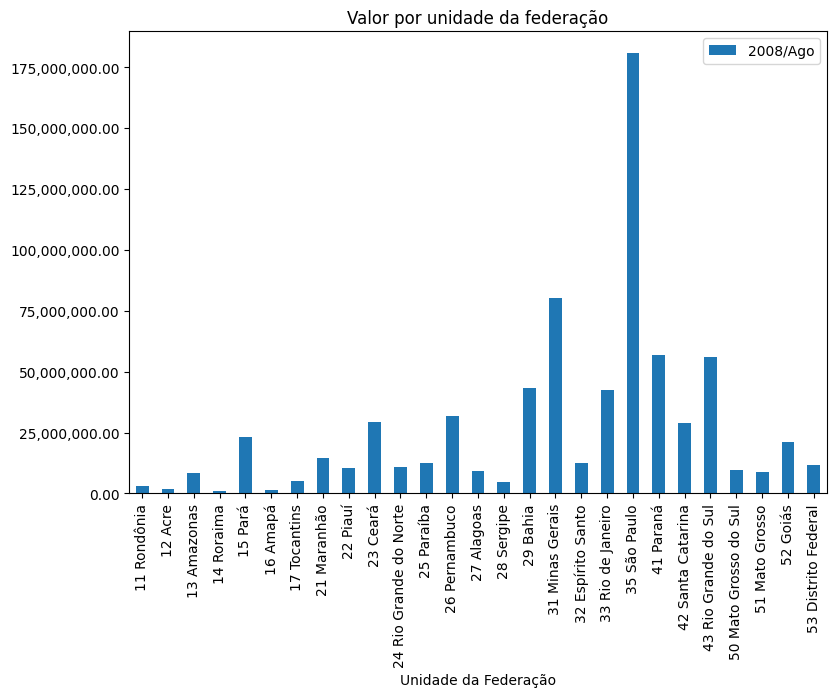

In [502]:
axis = df_atendimento.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()


## Desafios
### 1. Deixar as legendas anguladas para facilitar a leitura
### 2. Fazer um gráfico como o acima para o mês mais recente.

Completaremos os dois abaixo.

In [503]:
coluna_recente = df_atendimento.columns[-2]
coluna_recente

'2025/Jan'

In [504]:
import numpy as np

In [505]:
df_atendimento[coluna_recente] = df_atendimento[coluna_recente].replace('-', np.nan).astype(float)
df_atendimento[coluna_recente]

0      2758684.28
1             NaN
2      6664235.65
3             NaN
4     14861885.10
5      1870008.23
6      2558853.91
7     14167784.17
8      8661345.49
9     20466478.61
10    10695236.55
11    22181612.79
12    53183496.03
13     5867825.94
14     2897390.57
15    35121217.44
16    97869146.78
17    18367566.70
18    37940675.61
19   210480831.49
20    69078550.67
21    41423167.08
22    35442563.64
23     3611400.51
24     8479123.04
25    25809563.12
26    16764896.04
Name: 2025/Jan, dtype: float64

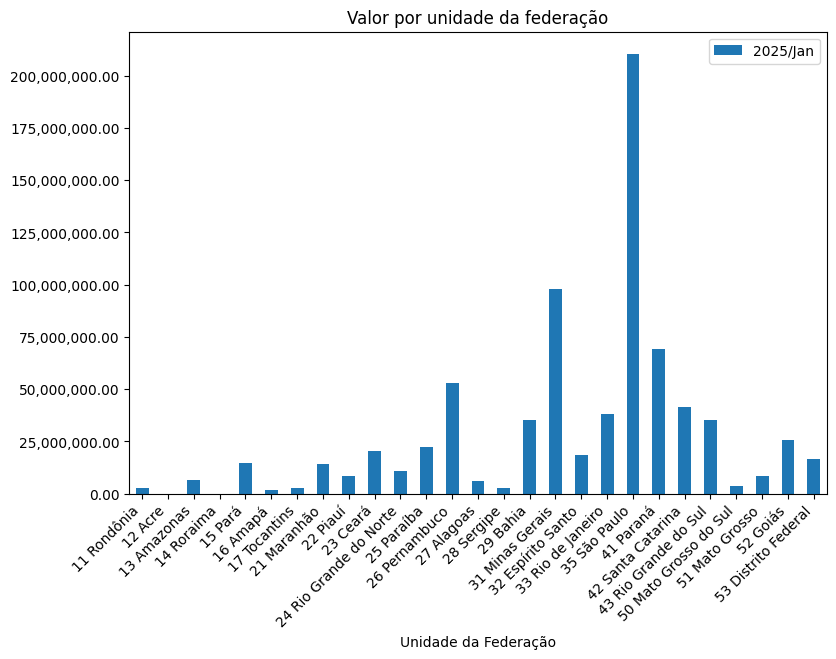

In [506]:
axis = df_atendimento.plot(x="Unidade da Federação", y=coluna_recente, kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')

plt.title("Valor por unidade da federação")
plt.show()

# 1.3 Manipulação de dados

Demonstração de como selecionar múltiplas colunas:

In [507]:
df_atendimento[['2008/Ago','2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Quero agora selecionar coluna **apenas quando temos dados para TODAS as UFs**.
.mean() nos retorna dados APENAS quando todas estão preenchidas.

In [508]:
colunas_preenchidas = df_atendimento.mean(numeric_only=True).index.tolist()
colunas_preenchidas.insert(0,'Unidade da Federação')
colunas_preenchidas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [509]:
df_atendimento_preenchido = df_atendimento[colunas_preenchidas]
df_atendimento_preenchido

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646620087.26
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489970130.16
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26
5,16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,4347577.72,4184142.89,4366717.71,4211396.18,4195741.10,4336396.75,3794028.79,3511515.03,1870008.23,483661602.42
6,17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91,1492979261.92
7,21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,45361942.72,43460938.56,45026340.52,45981402.90,45600967.69,43609705.31,36114501.96,28645837.82,14167784.17,5779843412.44
8,22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49,3329911635.55
9,23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709334950.21


In [510]:
df_atendimento_preenchido = df_atendimento_preenchido.set_index('Unidade da Federação')
df_atendimento_preenchido

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646620087.26
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489970130.16
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,4347577.72,4184142.89,4366717.71,4211396.18,4195741.10,4336396.75,3794028.79,3511515.03,1870008.23,483661602.42
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91,1492979261.92
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,45361942.72,43460938.56,45026340.52,45981402.90,45600967.69,43609705.31,36114501.96,28645837.82,14167784.17,5779843412.44
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49,3329911635.55


Com o index sendo igual a UF, agora podemos ver os dados com mais claridade quando selecionamos uma coluna.

In [511]:
df_atendimento_preenchido['2010/Ago'].head()

Unidade da Federação
11 Rondônia    4464307.47
12 Acre        2454599.37
13 Amazonas    9437224.41
14 Roraima     2046063.98
15 Pará       27761867.94
Name: 2010/Ago, dtype: float64

In [512]:
df_atendimento_preenchido.loc["12 Acre"] # procurando pelo index

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2024/Out     4602457.27
2024/Nov     3925559.35
2024/Dez     1415201.09
2025/Jan            NaN
Total      646620087.26
Name: 12 Acre, Length: 211, dtype: float64

In [513]:
df_atendimento_preenchido.iloc[1] # procurando pelo contador de linha

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2024/Out     4602457.27
2024/Nov     3925559.35
2024/Dez     1415201.09
2025/Jan            NaN
Total      646620087.26
Name: 12 Acre, Length: 211, dtype: float64

## Começando a organizar o gráfico

In [514]:
df_atendimento_preenchido.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<Axes: >

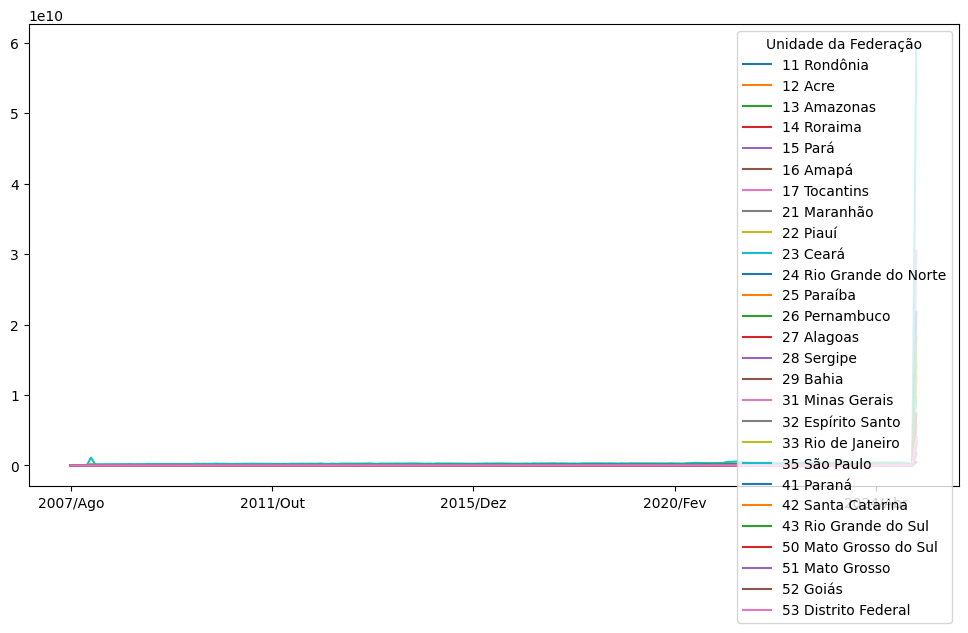

In [515]:
df_atendimento_preenchido.T.plot(figsize=(12,6))

No final do DF temos o total, que está distorcendo o gráfico.

In [516]:
df_atendimento_preenchido.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Out,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,72394759.41,...,46194205.41,142773517.13,447928600.94,171103139.87,135751413.24,132437000.00,25743057.05,26850694.38,49652238.35,32528006.84
2024/Nov,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,61006623.97,...,38788116.33,109522394.10,387444440.51,139925364.31,114417047.85,103583124.61,18186248.86,20561114.34,44973037.35,29245003.46
2024/Dez,6519383.53,1415201.09,15476800.24,6307.79,35595477.64,3511515.03,4795457.30,28645837.82,14158169.45,46506146.12,...,33006426.70,85513544.90,324445311.14,115211619.99,82458534.29,74462448.83,12339588.67,15602957.81,39851862.13,24483952.98
2025/Jan,2758684.28,NaN,6664235.65,NaN,14861885.10,1870008.23,2558853.91,14167784.17,8661345.49,20466478.61,...,18367566.70,37940675.61,210480831.49,69078550.67,41423167.08,35442563.64,3611400.51,8479123.04,25809563.12,16764896.04
Total,1560284917.23,646620087.26,2888132298.30,489970130.16,6983761195.26,483661602.42,1492979261.92,5779843412.44,3329911635.55,9709334950.21,...,5321814286.42,15932166132.66,59610430175.39,21797575319.52,12284661079.47,18241384664.44,3553457995.83,3308268753.12,7343470595.15,3935843165.77


In [517]:
df_atendimento_preenchido = df_atendimento_preenchido.drop('Total', axis=1)
df_atendimento_preenchido.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Set,14150716.10,4684727.01,23723027.50,2368791.93,57356780.09,4195741.10,10114640.44,45600967.69,23587479.21,73438447.34,...,45950101.54,138174217.97,433154845.88,170071507.23,128810577.51,126549202.91,27540863.66,26996002.44,50808426.77,32469797.15
2024/Out,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,72394759.41,...,46194205.41,142773517.13,447928600.94,171103139.87,135751413.24,132437000.00,25743057.05,26850694.38,49652238.35,32528006.84
2024/Nov,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,61006623.97,...,38788116.33,109522394.10,387444440.51,139925364.31,114417047.85,103583124.61,18186248.86,20561114.34,44973037.35,29245003.46
2024/Dez,6519383.53,1415201.09,15476800.24,6307.79,35595477.64,3511515.03,4795457.30,28645837.82,14158169.45,46506146.12,...,33006426.70,85513544.90,324445311.14,115211619.99,82458534.29,74462448.83,12339588.67,15602957.81,39851862.13,24483952.98
2025/Jan,2758684.28,NaN,6664235.65,NaN,14861885.10,1870008.23,2558853.91,14167784.17,8661345.49,20466478.61,...,18367566.70,37940675.61,210480831.49,69078550.67,41423167.08,35442563.64,3611400.51,8479123.04,25809563.12,16764896.04


<Axes: >

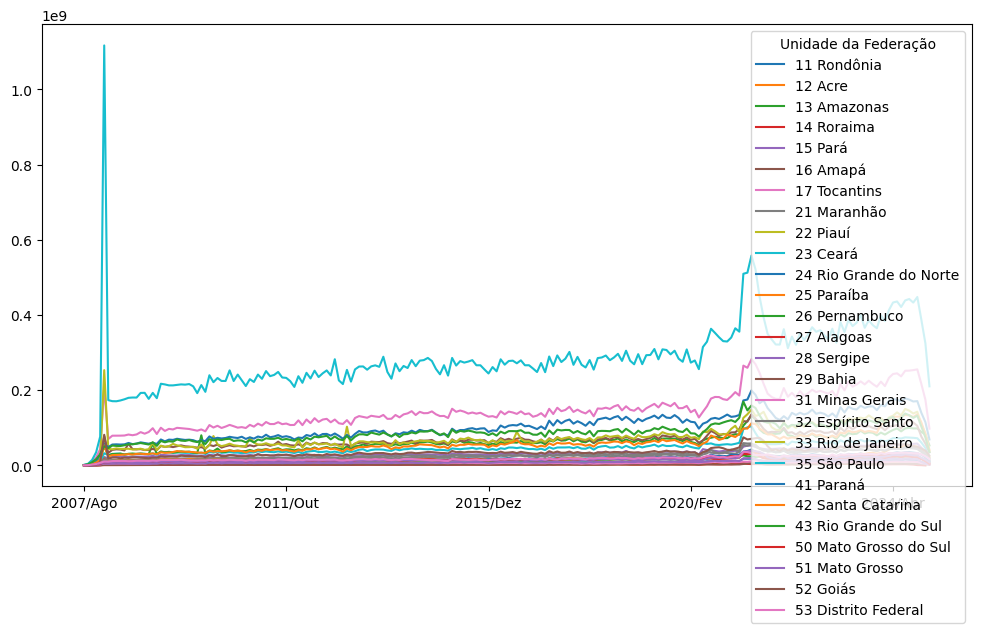

In [518]:
df_atendimento_preenchido.T.plot(figsize=(12,6))

## Desafios
1. Reposicionar a legenda
2. Retocar o título (colocar título nos eixos, etc)

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

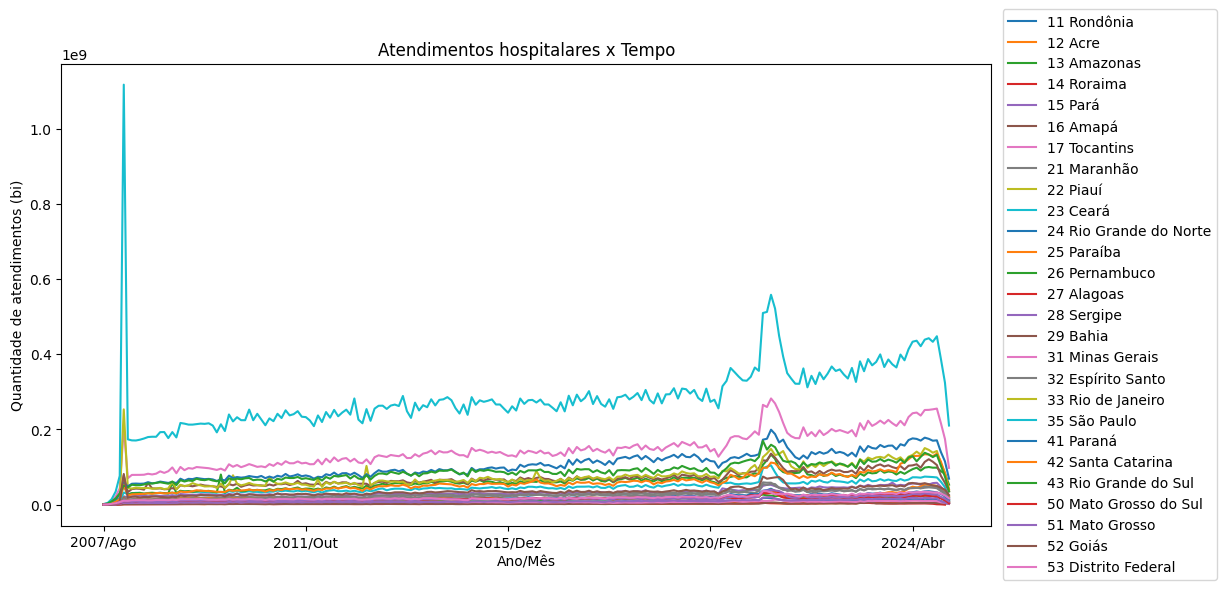

In [519]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

## Polindo o gráfico

O gráfico atual não está muito legível. Vamos separar os estados para arrumar isso:

In [520]:
df_atendimento_preenchido.T.columns[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

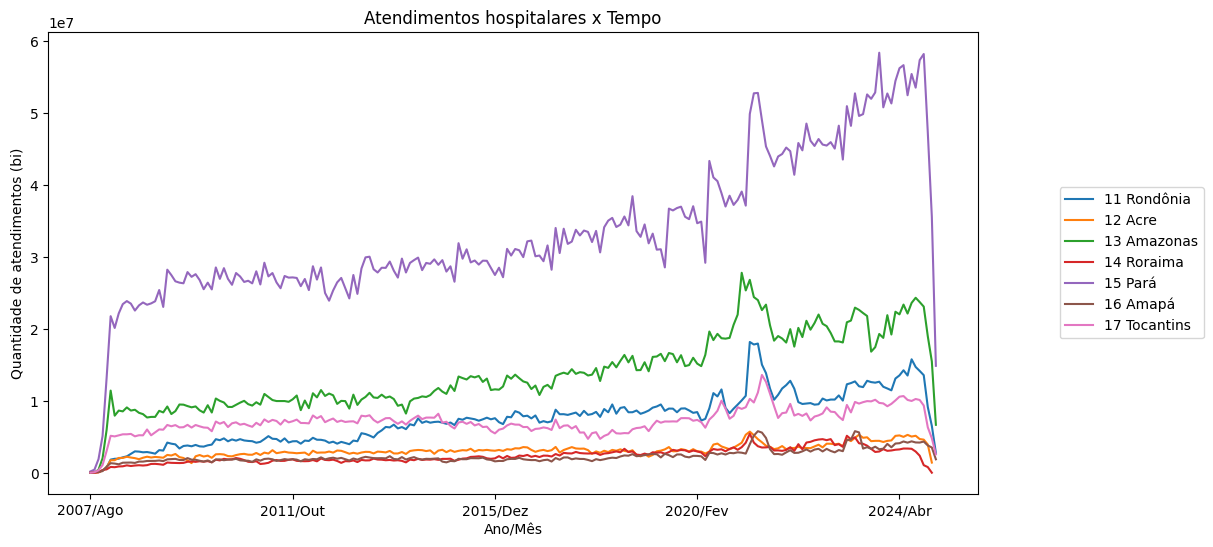

In [521]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido[:7].T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

In [522]:
df_atendimento_preenchido.sample(n=7) # retorna 7 dados aleatórios 

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,128990916.28,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,22015071.23,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,243167065.29,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,433371023.39,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,32938435.98,34982666.19,33259933.22,35170605.54,35720763.92,34123828.27,32685051.00,28560280.82,21808086.54,10695236.55
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3242788.00,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10572362.58,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91


Text(0, 0.5, 'Quantidade de atendimentos (bi)')

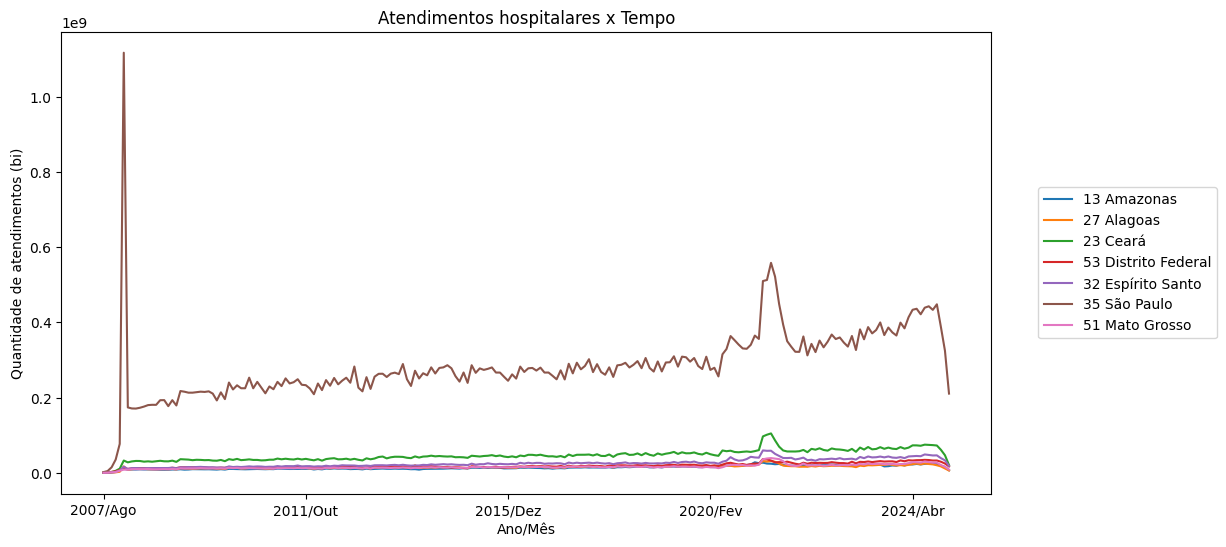

In [523]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.sample(n=7).T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

## Algoritmos de aleatoriedade

In [524]:
import numpy as np

In [525]:
np.random.seed(524387)
df_7_estados = df_atendimento_preenchido.sample(n=7)

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

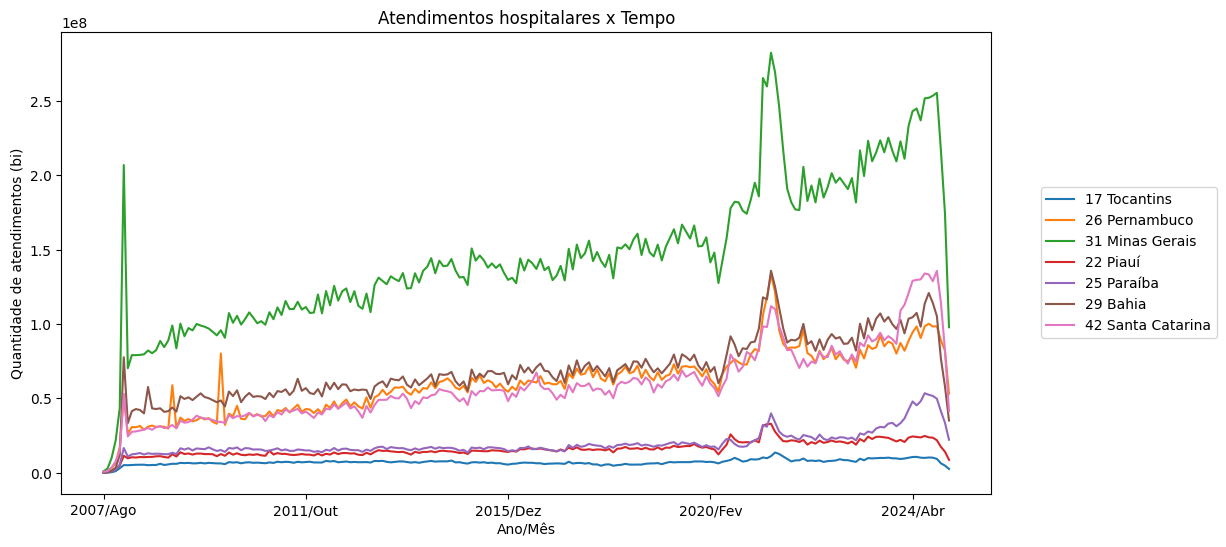

In [526]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_7_estados.T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

In [527]:
df_atendimento_preenchido['Total'] = df_atendimento_preenchido.sum(axis=1)
df_atendimento_preenchido.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284312.90
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646618803.44
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888129466.89
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489969716.47
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983742659.66


## Desafios
1. Ordenar DF de maneira descendente pelo total de atendimentos
2. Adicionar uma coluna com a região (Norte, Nordeste, Centro-Oeste, Sudeste, Sul)
3. Adicione seu estado nessa lista de 7 estados

In [528]:
df_atendimento_preenchido = df_atendimento_preenchido.sort_values(by='Total',ascending=False)
df_atendimento_preenchido.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64,18241267927.47
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,43951349.46,...,141062368.77,133167651.81,150484575.82,145672612.54,138174217.97,142773517.13,109522394.10,85513544.90,37940675.61,15932005589.75


In [529]:
estados_regioes = {k:'Norte' for k in ['Amazonas','Pará','Roraima','Amapá','Rondônia','Acre','Tocantins']}
estados_regioes.update({k:'Nordeste' for k in ['Piauí','Maranhão','Pernambuco','Rio Grande do Norte','Paraíba','Ceará','Bahia','Alagoas','Sergipe']})
estados_regioes.update({k:'Centro-Oeste' for k in ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás','Distrito Federal']})
estados_regioes.update({k:'Sudeste' for k in ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']})
estados_regioes.update({k:'Sul' for k in ['Rio Grande do Sul', 'Paraná', 'Santa Catarina']})


estados_regioes

{'Amazonas': 'Norte',
 'Pará': 'Norte',
 'Roraima': 'Norte',
 'Amapá': 'Norte',
 'Rondônia': 'Norte',
 'Acre': 'Norte',
 'Tocantins': 'Norte',
 'Piauí': 'Nordeste',
 'Maranhão': 'Nordeste',
 'Pernambuco': 'Nordeste',
 'Rio Grande do Norte': 'Nordeste',
 'Paraíba': 'Nordeste',
 'Ceará': 'Nordeste',
 'Bahia': 'Nordeste',
 'Alagoas': 'Nordeste',
 'Sergipe': 'Nordeste',
 'Mato Grosso': 'Centro-Oeste',
 'Mato Grosso do Sul': 'Centro-Oeste',
 'Goiás': 'Centro-Oeste',
 'Distrito Federal': 'Centro-Oeste',
 'São Paulo': 'Sudeste',
 'Rio de Janeiro': 'Sudeste',
 'Espírito Santo': 'Sudeste',
 'Minas Gerais': 'Sudeste',
 'Rio Grande do Sul': 'Sul',
 'Paraná': 'Sul',
 'Santa Catarina': 'Sul'}

In [530]:
import re
lista_estados = [re.sub('[0-9]','',x).strip() for x in df_atendimento_preenchido.index.values]

In [531]:
df_atendimento_preenchido.insert(0, 'Região', [estados_regioes[estado] for estado in lista_estados])

In [532]:
df_atendimento_preenchido

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,...,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64,18241267927.47
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,...,141062368.77,133167651.81,150484575.82,145672612.54,138174217.97,142773517.13,109522394.10,85513544.90,37940675.61,15932005589.75
29 Bahia,Nordeste,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77652692.45,33410124.06,41416056.79,42826993.62,...,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44,14376635757.14
26 Pernambuco,Nordeste,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,...,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03,12686265263.54
42 Santa Catarina,Sul,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,...,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08,12284521970.45
23 Ceará,Nordeste,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709323635.86


In [533]:
df_7_estados.loc[len(df_7_estados)] = df_atendimento_preenchido.loc['35 São Paulo']
df_7_estados.index.values[7] = '35 São Paulo'
df_7_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10572362.58,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,94422997.84,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,243167065.29,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24399698.15,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,47934036.01,45361095.49,48076662.53,53453052.51,52443876.99,51645634.13,49784654.50,41335307.82,33622989.17,22181612.79
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77652692.45,33410124.06,41416056.79,42826993.62,42185290.32,...,104568608.38,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,129113466.16,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,433371023.39,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49


In [534]:
df_atendimento_preenchido

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,...,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64,18241267927.47
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,...,141062368.77,133167651.81,150484575.82,145672612.54,138174217.97,142773517.13,109522394.10,85513544.90,37940675.61,15932005589.75
29 Bahia,Nordeste,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77652692.45,33410124.06,41416056.79,42826993.62,...,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44,14376635757.14
26 Pernambuco,Nordeste,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,...,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03,12686265263.54
42 Santa Catarina,Sul,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,...,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08,12284521970.45
23 Ceará,Nordeste,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709323635.86


In [535]:
df_atendimento_preenchido.iloc[:,1:-1].T

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,...,22 Piauí,51 Mato Grosso,27 Alagoas,13 Amazonas,28 Sergipe,11 Rondônia,17 Tocantins,12 Acre,14 Roraima,16 Amapá
2007/Ago,1665349.90,971394.37,554800.22,1049252.33,469469.34,135146.36,400640.85,693955.05,357904.65,179395.82,...,220788.25,63562.50,104243.75,35752.72,27453.63,4209.37,4113.76,10470.07,4785.91,33672.74
2007/Set,4434168.64,2861781.50,1431708.01,3182913.14,921646.57,448349.75,1088340.42,1092964.12,572356.18,418053.58,...,353468.67,232444.62,174024.90,45570.64,78565.19,16397.03,76633.06,14001.71,11858.63,104822.98
2007/Out,14577395.84,10018011.35,4630402.44,8571312.11,2994664.57,1382038.11,2973553.48,3562300.82,1865065.71,1198730.25,...,1078182.68,927219.59,595544.54,416012.30,122952.94,133645.19,343702.61,86200.85,43852.67,118378.28
2007/Nov,35032259.98,21730281.63,11120030.79,16592432.80,7250528.08,3348779.62,6699828.82,7578502.38,5131814.39,2712117.54,...,2406035.32,1740439.60,1125396.73,2020381.79,775705.52,346912.84,1068685.94,301323.68,369328.51,226661.18
2007/Dez,76668547.41,43429517.54,28790722.87,30134255.70,13627123.27,11948984.56,16919031.39,14772555.10,10798042.86,9293914.78,...,4929772.93,5394225.43,2564966.65,5949408.99,2765495.63,711758.31,3022200.87,769612.36,470676.43,844019.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024/Set,433154845.88,253554464.99,170071507.23,126549202.91,138174217.97,114186674.58,98357436.48,128810577.51,73438447.34,50808426.77,...,23587479.21,26996002.44,22262711.82,23723027.50,16780946.40,14150716.10,10114640.44,4684727.01,2368791.93,4195741.10
2024/Out,447928600.94,255511700.85,171103139.87,132437000.00,142773517.13,105336530.32,98490779.00,135751413.24,72394759.41,49652238.35,...,21865890.66,26850694.38,19834863.30,23091729.84,16662663.51,13560840.74,9345504.78,4602457.27,1054670.97,4336396.75
2024/Nov,387444440.51,216701546.87,139925364.31,103583124.61,109522394.10,76709673.21,89017887.66,114417047.85,61006623.97,44973037.35,...,17369877.05,20561114.34,16853668.67,18975268.18,9246800.13,9139104.31,6318575.89,3925559.35,787381.40,3794028.79
2024/Dez,324445311.14,174586144.37,115211619.99,74462448.83,85513544.90,58097406.80,82219989.16,82458534.29,46506146.12,39851862.13,...,14158169.45,15602957.81,11303014.57,15476800.24,4973245.47,6519383.53,4795457.30,1415201.09,6307.79,3511515.03


Text(0, 0.5, 'Quantidade de atendimentos (bi)')

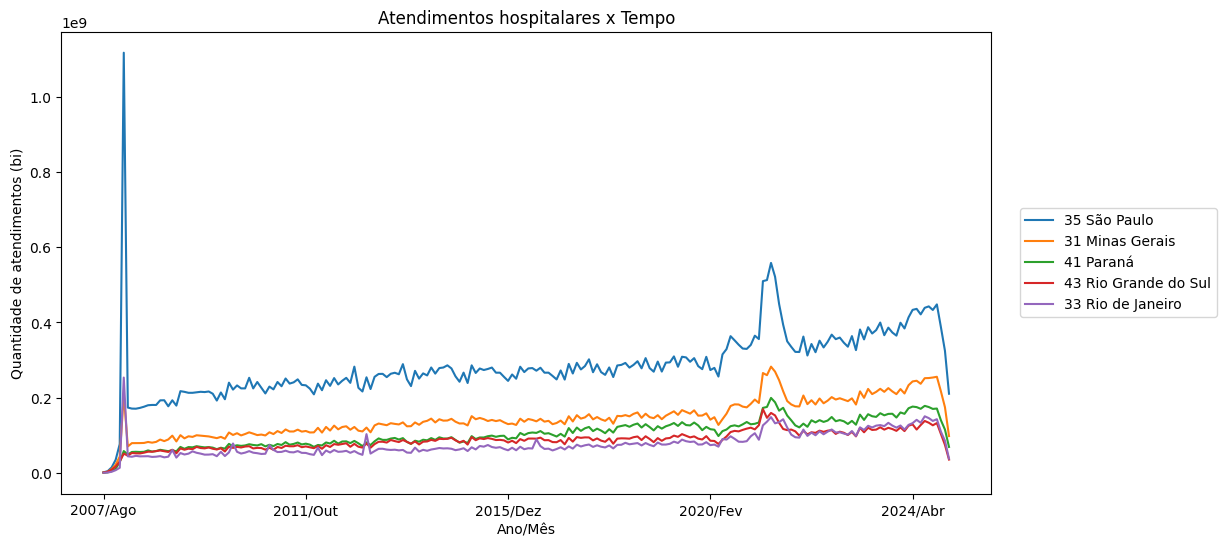

In [536]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.iloc[:,1:-1].head().T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

Vamos identificar o que está acontecendo com esse pico anômalo no gráfico.

É provável que em 2008, foram lançados dados passados no em 2008/Janeiro.

Vamos desconsiderar as colunas até esse pico.

In [537]:
colunas_remover = df_atendimento_preenchido.columns[1:7]
df_atendimento_preenchido = df_atendimento_preenchido.drop(colunas_remover,axis=1)
df_atendimento_preenchido

,Região,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,173693591.16,170948652.27,170668406.20,172810306.39,175948218.52,179866895.72,180652762.21,180548710.81,192894902.37,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,Sudeste,70301089.50,79119005.51,79046322.41,79268070.12,79632111.54,82225138.22,80374117.08,82442262.90,88613476.60,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,Sul,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01
43 Rio Grande do Sul,Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,...,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64,18241267927.47
33 Rio de Janeiro,Sudeste,44128159.73,42933765.97,45324789.60,43951349.46,44143987.63,44360299.24,42502172.22,43066461.47,44553314.55,...,141062368.77,133167651.81,150484575.82,145672612.54,138174217.97,142773517.13,109522394.10,85513544.90,37940675.61,15932005589.75
29 Bahia,Nordeste,33410124.06,41416056.79,42826993.62,42185290.32,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,...,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44,14376635757.14
26 Pernambuco,Nordeste,26222079.10,30716361.81,30589332.79,31424612.72,28947510.92,30985515.77,31705296.79,30703879.20,31165074.59,...,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03,12686265263.54
42 Santa Catarina,Sul,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,...,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08,12284521970.45
23 Ceará,Nordeste,27643304.86,30085370.22,31376221.00,31189904.62,29463965.11,30302691.99,29304821.51,30435026.82,31741382.87,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709323635.86


Text(0, 0.5, 'Quantidade de atendimentos (bi)')

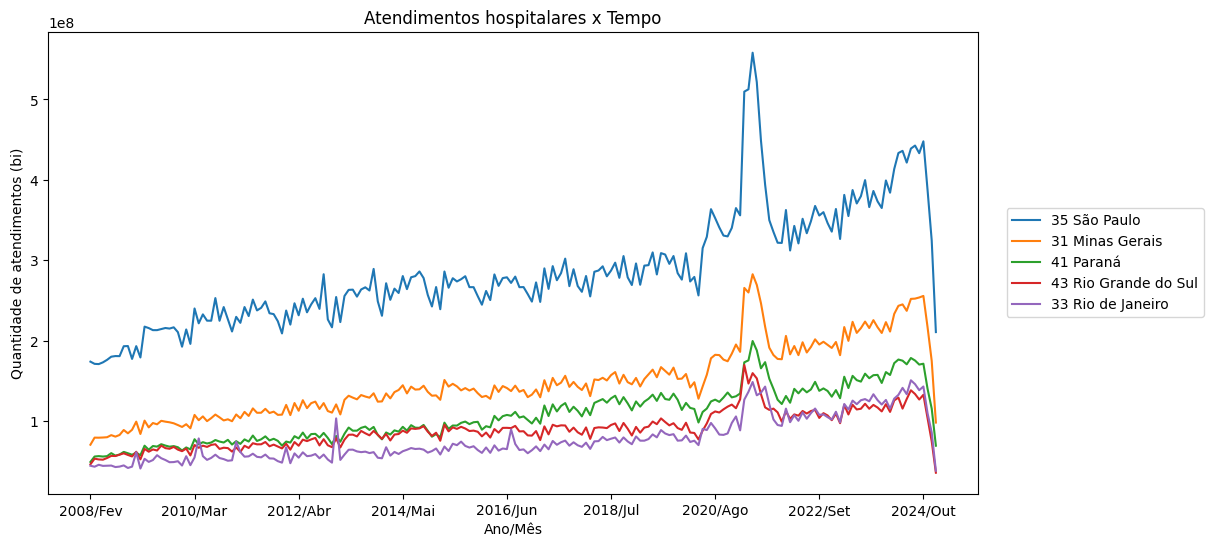

In [538]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.iloc[:,1:-1].head().T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

## Desafios
1. Refinar o gráfico
2. Fazer um gráfico para cada região do Brasil

In [539]:
df_atendimento_preenchido.iloc[:,1:-1].columns.to_list()

['2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',
 '2014/Jun',

In [540]:
ticks = ['2008/Fev']
ticks += [f'{i}/Jan' for i in range(2009,2026)]
ticks

['2008/Fev',
 '2009/Jan',
 '2010/Jan',
 '2011/Jan',
 '2012/Jan',
 '2013/Jan',
 '2014/Jan',
 '2015/Jan',
 '2016/Jan',
 '2017/Jan',
 '2018/Jan',
 '2019/Jan',
 '2020/Jan',
 '2021/Jan',
 '2022/Jan',
 '2023/Jan',
 '2024/Jan',
 '2025/Jan']

In [541]:
indexes = [df_atendimento_preenchido.columns.values.tolist().index(x) for x in ticks]
indexes

[1,
 12,
 24,
 36,
 48,
 60,
 72,
 84,
 96,
 108,
 120,
 132,
 144,
 156,
 168,
 180,
 192,
 204]

([<matplotlib.axis.XTick at 0x1d625ea01d0>,
 [Text(1, 0, '2008/Fev'),
  Text(12, 0, '2009/Jan'),
  Text(24, 0, '2010/Jan'),
  Text(36, 0, '2011/Jan'),
  Text(48, 0, '2012/Jan'),
  Text(60, 0, '2013/Jan'),
  Text(72, 0, '2014/Jan'),
  Text(84, 0, '2015/Jan'),
  Text(96, 0, '2016/Jan'),
  Text(108, 0, '2017/Jan'),
  Text(120, 0, '2018/Jan'),
  Text(132, 0, '2019/Jan'),
  Text(144, 0, '2020/Jan'),
  Text(156, 0, '2021/Jan'),
  Text(168, 0, '2022/Jan'),
  Text(180, 0, '2023/Jan'),
  Text(192, 0, '2024/Jan'),
  Text(204, 0, '2025/Jan')])

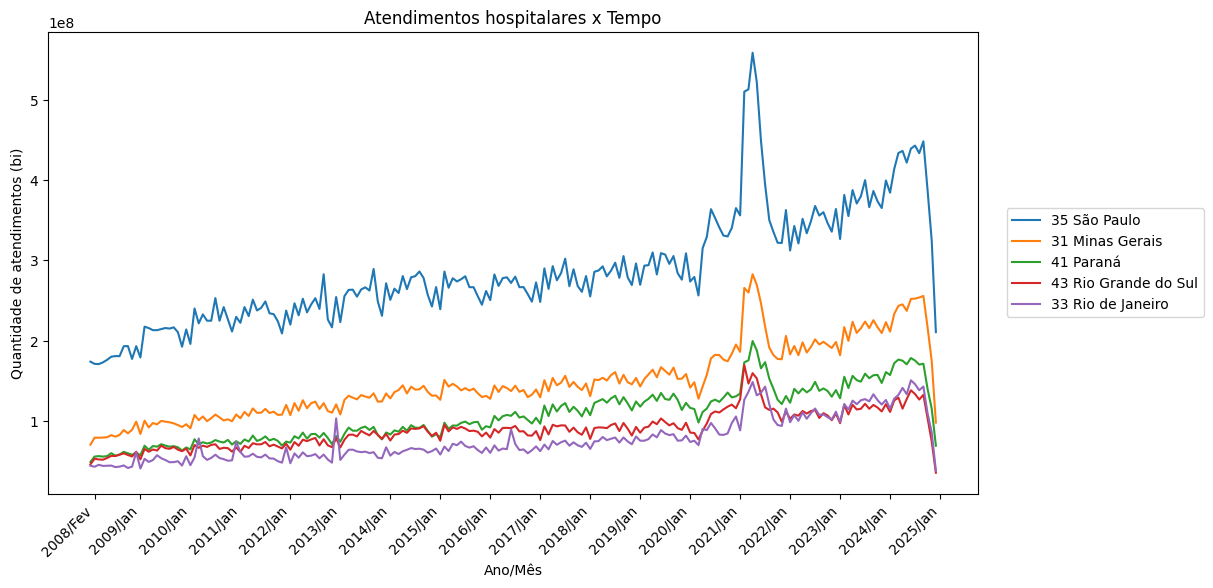

In [542]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.iloc[:,1:-1].head().T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')
plt.xticks(indexes, ticks,rotation=45, ha='right')

In [543]:
df_sudeste = df_atendimento_preenchido[df_atendimento_preenchido['Região'] == 'Sudeste']

([<matplotlib.axis.XTick at 0x1d626d792e0>,
 [Text(1, 0, '2008/Fev'),
  Text(12, 0, '2009/Jan'),
  Text(24, 0, '2010/Jan'),
  Text(36, 0, '2011/Jan'),
  Text(48, 0, '2012/Jan'),
  Text(60, 0, '2013/Jan'),
  Text(72, 0, '2014/Jan'),
  Text(84, 0, '2015/Jan'),
  Text(96, 0, '2016/Jan'),
  Text(108, 0, '2017/Jan'),
  Text(120, 0, '2018/Jan'),
  Text(132, 0, '2019/Jan'),
  Text(144, 0, '2020/Jan'),
  Text(156, 0, '2021/Jan'),
  Text(168, 0, '2022/Jan'),
  Text(180, 0, '2023/Jan'),
  Text(192, 0, '2024/Jan'),
  Text(204, 0, '2025/Jan')])

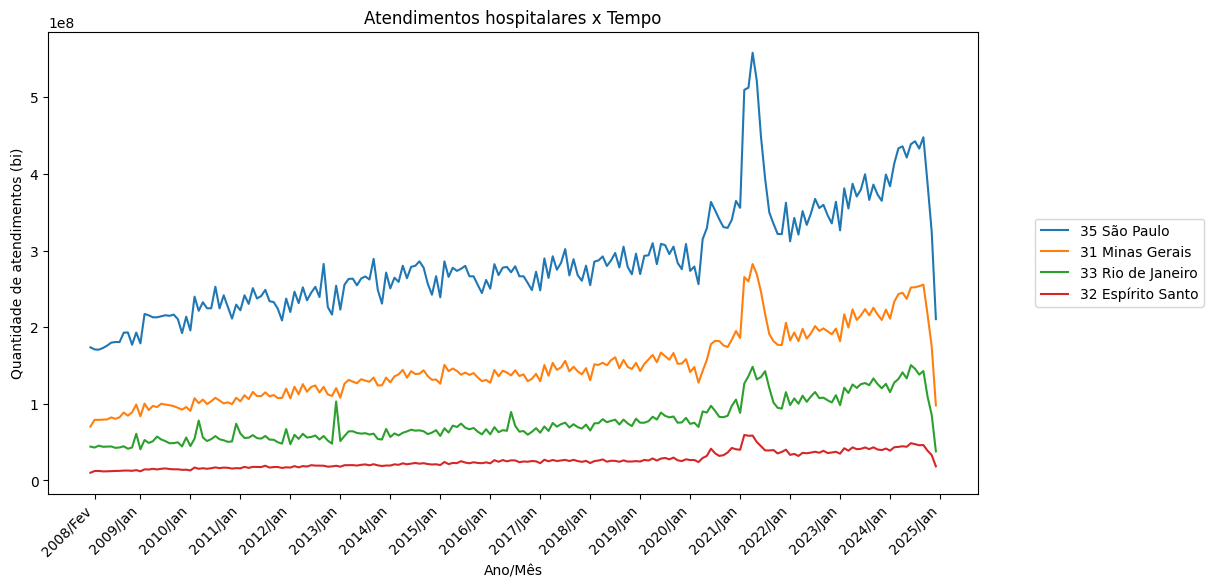

In [544]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_sudeste.iloc[:,1:-1].head().T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')
plt.xticks(indexes, ticks,rotation=45, ha='right')

## Extra (estudo própio)
Há algum padrão de admissões ao longo do ano? Ou seja, há meses em que temos mais admissões hospitalares?

Para identificar isso, precisaremos agrupar os dados por ano.

In [545]:
df_atendimento_anual = df_atendimento_preenchido.copy()
df_atendimento_anual.head(3)

,Região,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,173693591.16,170948652.27,170668406.20,172810306.39,175948218.52,179866895.72,180652762.21,180548710.81,192894902.37,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,Sudeste,70301089.50,79119005.51,79046322.41,79268070.12,79632111.54,82225138.22,80374117.08,82442262.90,88613476.60,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,Sul,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01


In [546]:
new_columns = [tuple(x.split('/')) for x in df_atendimento_anual.columns.to_list()]
new_columns

[('Região',),
 ('2008', 'Fev'),
 ('2008', 'Mar'),
 ('2008', 'Abr'),
 ('2008', 'Mai'),
 ('2008', 'Jun'),
 ('2008', 'Jul'),
 ('2008', 'Ago'),
 ('2008', 'Set'),
 ('2008', 'Out'),
 ('2008', 'Nov'),
 ('2008', 'Dez'),
 ('2009', 'Jan'),
 ('2009', 'Fev'),
 ('2009', 'Mar'),
 ('2009', 'Abr'),
 ('2009', 'Mai'),
 ('2009', 'Jun'),
 ('2009', 'Jul'),
 ('2009', 'Ago'),
 ('2009', 'Set'),
 ('2009', 'Out'),
 ('2009', 'Nov'),
 ('2009', 'Dez'),
 ('2010', 'Jan'),
 ('2010', 'Fev'),
 ('2010', 'Mar'),
 ('2010', 'Abr'),
 ('2010', 'Mai'),
 ('2010', 'Jun'),
 ('2010', 'Jul'),
 ('2010', 'Ago'),
 ('2010', 'Set'),
 ('2010', 'Out'),
 ('2010', 'Nov'),
 ('2010', 'Dez'),
 ('2011', 'Jan'),
 ('2011', 'Fev'),
 ('2011', 'Mar'),
 ('2011', 'Abr'),
 ('2011', 'Mai'),
 ('2011', 'Jun'),
 ('2011', 'Jul'),
 ('2011', 'Ago'),
 ('2011', 'Set'),
 ('2011', 'Out'),
 ('2011', 'Nov'),
 ('2011', 'Dez'),
 ('2012', 'Jan'),
 ('2012', 'Fev'),
 ('2012', 'Mar'),
 ('2012', 'Abr'),
 ('2012', 'Mai'),
 ('2012', 'Jun'),
 ('2012', 'Jul'),
 ('2012', 'Ago

In [547]:
df_atendimento_anual.columns = pd.MultiIndex.from_tuples(new_columns)
df_atendimento_anual

Região         2008                            \
                                 NaN          Fev          Mar          Abr   
Unidade da Federação                                                          
35 São Paulo                 Sudeste 173693591.16 170948652.27 170668406.20   
31 Minas Gerais              Sudeste  70301089.50  79119005.51  79046322.41   
41 Paraná                        Sul  48855046.46  55611791.07  56115135.82   
43 Rio Grande do Sul             Sul  45897704.82  52928695.92  51972416.77   
33 Rio de Janeiro            Sudeste  44128159.73  42933765.97  45324789.60   
29 Bahia                    Nordeste  33410124.06  41416056.79  42826993.62   
26 Pernambuco               Nordeste  26222079.10  30716361.81  30589332.79   
42 Santa Catarina                Sul  24409572.92  27483480.50  27806641.44   
23 Ceará                    Nordeste  27643304.86  30085370.22  31376221.00   
52 Goiás                Centro-Oeste  18149374.27  20992213.03  21049477.30   
15 Pará                        Norte  20126081.01  22149375.82  23436682.75   
21 Maranhão                 Nordeste  13452263.93  14750895.33  15148647.11   
32 Espírito Santo            Sudeste  10032886.43  12262049.08  12453466.98   
25 Paraíba                  Nordeste  10871589.62  12348758.14  12680965.13   
24 Rio Grande do Norte      Nordeste   9110108.87  10126626.54  10964234.85   
53 Distrito Federal     Centro-Oeste  10215956.80  11627918.26  11922015.36   
50 Mato Grosso do Sul   Centro-Oeste   8279288.79   9793888.78   8997542.75   
22 Piauí                    Nordeste   9711680.20  10428191.09  10227943.00   
51 Mato Grosso          Centro-Oeste   7929894.93   9416367.68   9390588.03   
27 Alagoas                  Nordeste   8112220.30   9210505.56  10466691.94   
13 Amazonas                    Norte   7934652.10   8641517.13   8531576.49   
28 Sergipe                  Nordeste   4636850.76   5017838.07   5265951.03   
11 Rondônia                    Norte   1940792.63   1955721.68   2143353.81   
17 Tocantins                   Norte   5051932.07   5200151.87   5343714.73   
12 Acre                        Norte   1743978.66   2057439.02   2057829.69   
14 Roraima                     Norte    771687.83    876091.18    896952.53   
16 Amapá                       Norte   1275063.72   1177745.93   1396371.51   

                                                                            \
                                Mai          Jun          Jul          Ago   
Unidade da Federação                                                         
35 São Paulo           172810306.39 175948218.52 179866895.72 180652762.21   
31 Minas Gerais         79268070.12  79632111.54  82225138.22  80374117.08   
41 Paraná               55574831.93  56094754.74  59802402.07  56699001.13   
43 Rio Grande do Sul    51679350.79  53759674.01  56391647.77  56233758.74   
33 Rio de Janeiro       43951349.46  44143987.63  44360299.24  42502172.22   
29 Bahia                42185290.32  39910042.40  57664560.93  43254543.33   
26 Pernambuco           31424612.72  28947510.92  30985515.77  31705296.79   
42 Santa Catarina       28354279.52  28993292.76  30049455.69  28887854.62   
23 Ceará                31189904.62  29463965.11  30302691.99  29304821.51   
52 Goiás                19162546.79  20573253.75  20127825.45  21160975.80   
15 Pará                 23861080.80  23502915.90  22544291.26  23259148.28   
21 Maranhão             14543679.92  14553978.06  14536700.20  14609872.57   
32 Espírito Santo       11789786.09  11889687.35  12205584.14  12384068.19   
25 Paraíba              13258411.71  12246686.33  13090842.60  12673774.35   
24 Rio Grande do Norte  11032871.23  10450599.08  11119053.52  10812840.19   
53 Distrito Federal     11900817.00  11969271.76  11299443.00  11548451.89   
50 Mato Grosso do Sul    9842108.59  10257782.00  10167827.24   9602843.49   
22 Piauí                10562148.66  10465088.93  10618079.70  10645917.52   
51 Mato Grosso       

In [556]:
anos = [str(x) for x in range(2008,2026)]
anos

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025']

In [589]:
df_atendimento_anual['2008'].sum()

Fev   643906975.53
Mar   699276474.25
Abr   708100264.64
Mai   708350995.03
Jun   708744416.81
Jul   742653786.21
Ago   720071896.26
Set   730979554.18
Out   759399992.42
Nov   740966493.06
Dez   723305905.46
dtype: float64

In [592]:
df_atendimento_anual_total = pd.DataFrame()

In [594]:
for ano in anos:
    df_atendimento_anual_total[ano] = df_atendimento_anual[ano].sum()
df_atendimento_anual_total

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Fev,643906975.53,714722038.96,782884570.25,888682505.46,883674579.11,908164278.41,1025000307.97,1002649834.39,1070100590.02,1068878328.55,1109337536.02,1208494115.82,1223003284.69,1609239753.72,1467498356.57,1478544952.62,1759746733.18,NaN
Mar,699276474.25,874636995.91,946718227.19,961946613.04,1005752407.78,1037622590.41,1095485659.69,1213178651.55,1211598302.87,1267800522.02,1265053463.20,1285331901.38,1231052814.83,2228989091.02,1581638617.28,1763619807.21,1931541479.92,NaN
Abr,708100264.64,836369323.87,910794105.74,923140061.69,948572515.22,1091796517.26,1094877013.93,1134663878.86,1149597010.73,1155479760.12,1276891201.66,1309637516.20,1098073328.62,2221708504.39,1500686104.32,1639013473.58,2012929431.06,NaN
Mai,708350995.03,855799001.46,939843753.54,986998963.20,1033506752.08,1089872006.26,1156879131.72,1183917051.88,1208202923.84,1285904460.52,1309524880.85,1383355903.19,1321044738.65,2415711627.80,1630222136.91,1811353925.24,2019644545.27,NaN
Jun,708744416.81,850465482.82,877939163.77,936829395.12,960368839.35,1051875015.51,1095992895.97,1157535909.50,1199125539.25,1215935760.70,1254217459.97,1282942913.62,1409782306.52,2242852836.25,1537554106.04,1724888990.67,1965586359.64,NaN
Jul,742653786.21,872613183.55,896799799.94,945826326.44,1001094928.78,1092666765.64,1160276039.69,1184795929.36,1212900348.72,1248905979.97,1300645955.03,1395486056.95,1563282792.23,1990107744.50,1589841815.82,1764349113.94,2095595840.76,NaN
Ago,720071896.26,875125847.88,957860972.76,995805507.70,1025700076.43,1099465657.48,1150410328.89,1180685493.07,1225385605.13,1302069949.22,1334870197.60,1367931004.39,1525167741.18,1813651899.82,1677710781.03,1844108024.49,2082932645.57,NaN
Set,730979554.18,857813407.84,900078540.42,932403018.57,956068891.71,1082388928.43,1160510910.24,1144045800.24,1153024787.55,1190337300.48,1236785036.16,1335658720.57,1465372631.49,1626849458.40,1593584792.61,1746000079.96,2030658558.14,NaN
Out,759399992.42,863596381.04,911761692.93,946040665.74,1040491086.62,1138682590.42,1162615799.20,1155651643.86,1157900420.10,1255349999.37,1343251706.02,1382223331.34,1471110147.32,1563258509.50,1623191512.19,1816093260.35,2041332672.45,NaN
Nov,740966493.06,840608765.99,891390503.58,913624195.74,931030060.95,1034203808.40,1091307600.93,1114209646.36,1105185784.62,1187415341.87,1246947698.76,1287382587.28,1485335397.50,1502804105.47,1571446005.49,1776022541.68,1689816088.07,NaN


<Axes: >

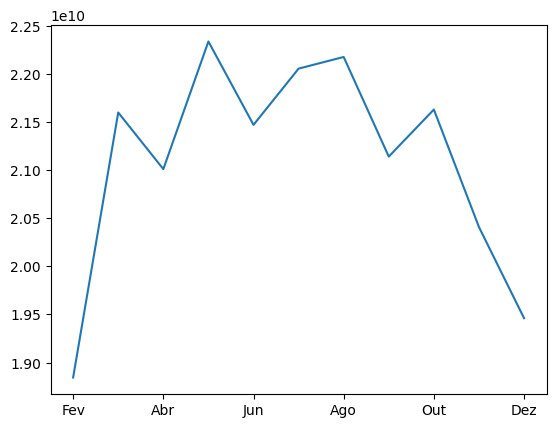

In [610]:
df_atendimento_anual_total.T.sum().plot()

Excluindo os anos de COVID e posteriores:

<Axes: >

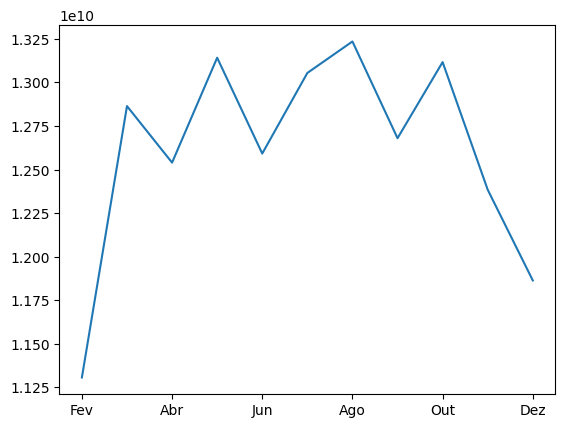

In [611]:
df_atendimento_anual_total.iloc[:,:-6].T.sum().plot()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Nov'),
  Text(0.0, 0, 'Fev'),
  Text(2.0, 0, 'Abr'),
  Text(4.0, 0, 'Jun'),
  Text(6.0, 0, 'Ago'),
  Text(8.0, 0, 'Out'),
  Text(10.0, 0, 'Dez'),
  Text(12.0, 0, '')])

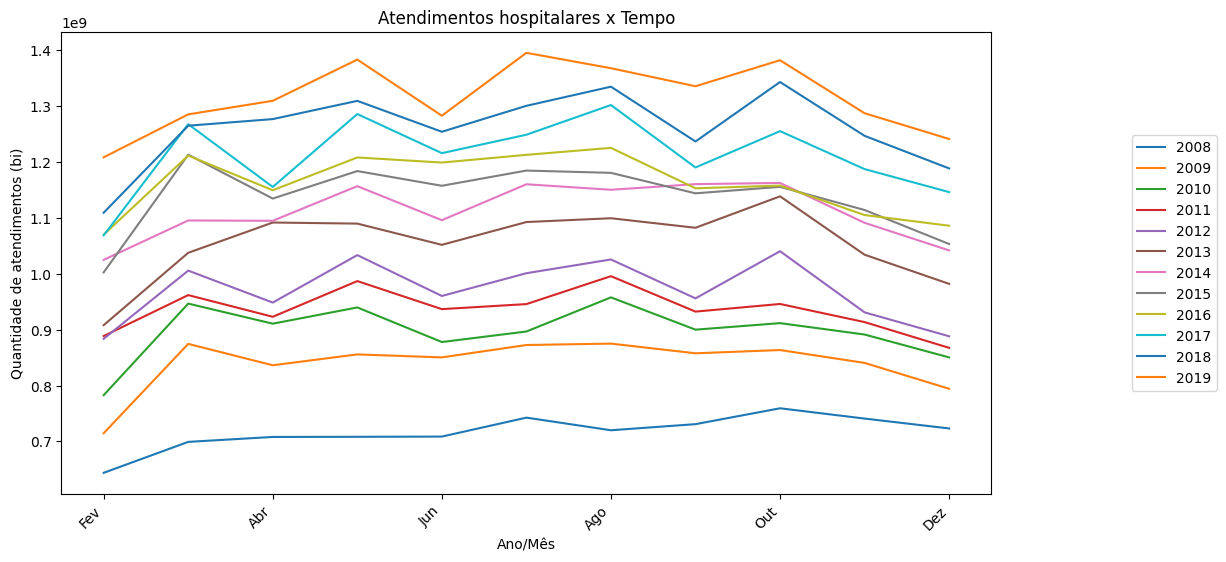

In [605]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_anual_total.iloc[:,:-6].plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')
plt.xticks(rotation=45, ha='right')